학습목표

로지스틱 회귀(Logistic Regression)에 대해 알아본다.
핵심키워드

* 로지스틱 회귀(Logistic Regression)
* 가설(Hypothesis)
* 손실함수(Cost Function)
* 평가(Evaluation)

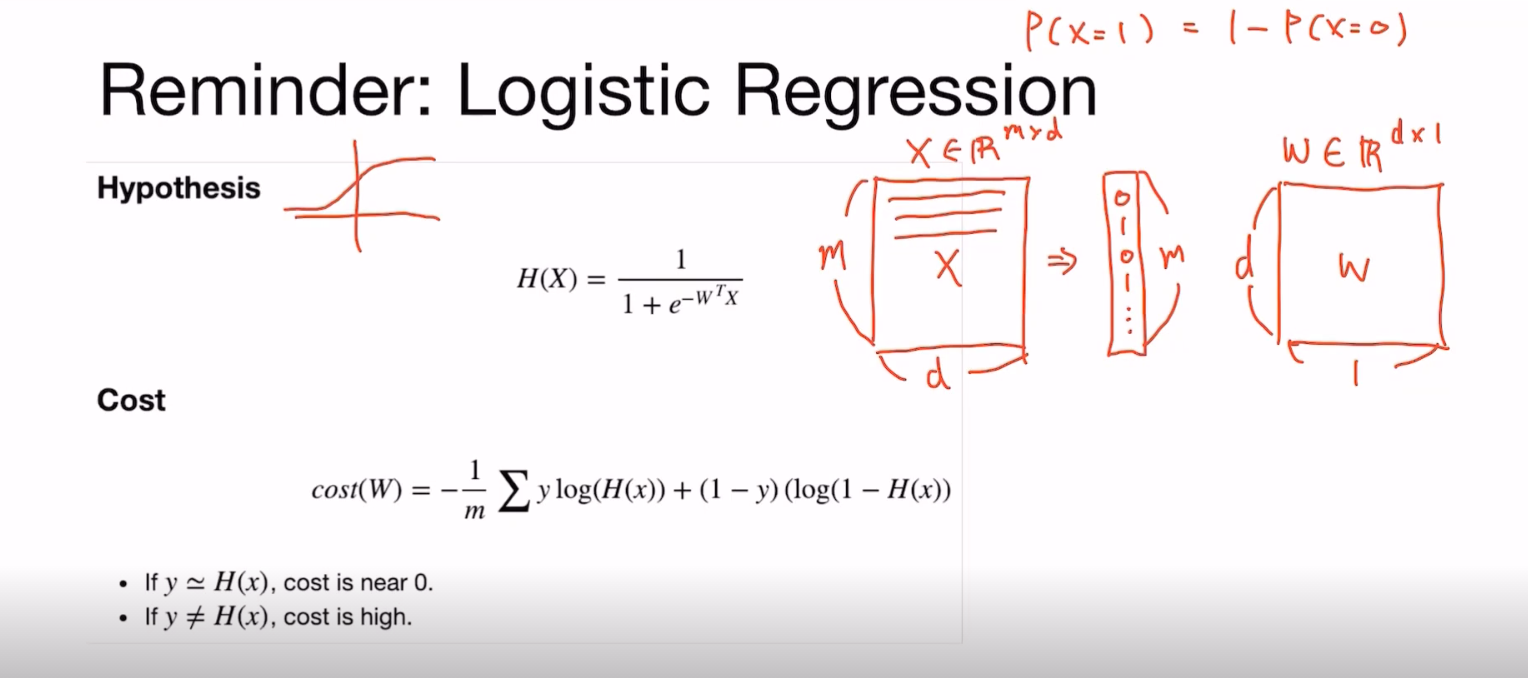

H(x)가 Wx를 그대로 활용한 형태가 아니라 Wx를 시그모이드 함수의 입력값으로 넣어준 형태인 이유는, 결과값을 확률값인 0과 1 사이로 항상 맞추어주기 위함이다.

## Imports

In [1]:
import torch
import torch.nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# for reproducibility

torch.manual_seed(42)

## Training Data

In [3]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

Consider the following classification problem: given the number of hours each student spent watching the lecture and working in the code lab, predict whether the student passed or failed a course. For example, the first student watched the lecture for 1 hour and spent 2 hours in the lab session([1,2]), and ended up failing the course([0]).

In [4]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

As always, we need these data to be in torch.Tensor format

In [5]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


## Computing the Hypothesis(예측)

Pytorch has torch.exp() function which resembles exponential func.

In [6]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


We can use it to compute hypothesis function conveniently

In [7]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [8]:
hypothesis = 1/ (1 + torch.exp(-(x_train.matmul(W) + b)))

In [9]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


Or we could use torch.sigmoid() function! This resembles sigmoid func

In [10]:
print('1/(1+e^{-1}) equals: ', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals:  tensor([0.7311])


Now the code for hypothesis function is clearer

In [11]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [12]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


In [13]:
print(y_train)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


---

## Computing the Cost Function

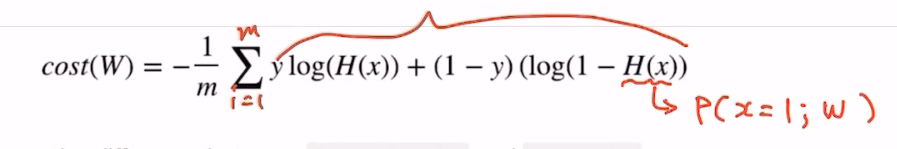

위의 필기 부분 해석: H(x)는 W값이 주어졌을 때 x=1일 확률

For one element, the loss can be computed as follows

In [16]:
-(y_train[0] * torch.log(hypothesis[0]) + (1-y_train[0])*torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

To compute the losses of the entire batch, we can simpoly input the entire vector

In [17]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


위 그림 참고해 보면, 1/m하는 과정이 아직 이루어지지 않았음

Then we just .mean() to take the mean of these individual losses

In [18]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


---

logistic regression에서의 loss값을 위의 수식을 코드로 구현하는 복잡한 과정 없이 편리하게 구해주는 .binary_cross_entropy() 매서드

In [20]:
# .binary_cross_entropy()는 한마디로 logistic regression에서 loss값을 구해주는 매서드
F.binary_cross_entropy(hypothesis, y_train) # or .bce

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

## Whole Training Procedure

In [15]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# for reproducibility
torch.manual_seed(42)

# 데이터
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2, 1), requires_grad = True)  # train_x의 d(dimension)이 2이므로
b = torch.zeros(1, requires_grad = True)

# optimizer 정의
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # 예측 및 Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)  # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 파라미터 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch: {:1d}/{} Loss: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch: 0/1000 Loss: 0.693147
Epoch: 100/1000 Loss: 0.134722
Epoch: 200/1000 Loss: 0.080643
Epoch: 300/1000 Loss: 0.057900
Epoch: 400/1000 Loss: 0.045300
Epoch: 500/1000 Loss: 0.037261
Epoch: 600/1000 Loss: 0.031673
Epoch: 700/1000 Loss: 0.027556
Epoch: 800/1000 Loss: 0.024394
Epoch: 900/1000 Loss: 0.021888
Epoch: 1000/1000 Loss: 0.019852


## Evaluation

After we finish training the model, we want to check how well our model fits the training set.

In [16]:
hypothesis = torch.sigmoid(x_train.mm(W) + b)
hypothesis[:5]

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward>)

We can change hypothesis(real num from 0 to 1) to binary predictions (either 0 or 1) by comparing them to 0.5

In [17]:
prediction = hypothesis >= torch.FloatTensor([0.5]) #prediction의 type은 byteTensor
print(prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


Then we compare it with the correct labels y_train

In [18]:
print(prediction[:5])
print(y_train[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [21]:
# Boolean값을 가지는 prediction값들을 숫자 0 혹은 1로 바꿔준 뒤 실제 정답인 y_train값과 비교
correct_prediction = prediction.float() == y_train  #correct_prediction은 ByteTensor
correct_prediction[:5]

tensor([[True],
        [True],
        [True],
        [True],
        [True]])

## Higher Implementation w/ Class
W와 b를 직접 선언하고 초기화 해줄 필요가 없어짐

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class BinaryClassifier(nn.Module):  # nn.Module에서 M은 대문자!!(소문자로 하면 에러)
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  # W shape 정해주기  #self.linear = {W, b}
        self.sigmoid = nn.Sigmoid()  #Sigmoid의 S도 대문자여야 함
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [2]:
model = BinaryClassifier()

In [3]:
# Data
torch.manual_seed(42)
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 100
for epoch in range(nb_epochs +1):
    # H(x)계산: H(x) == P(x = 1)
    hypothesis = model(x_train)
    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    # cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction) *100
        print('Epoch: {:1d}/{} Loss: {:.6f} Accuracy: {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy))

Epoch: 0/100 Loss: 0.638115 Accuracy: 50.00%
Epoch: 20/100 Loss: 0.597686 Accuracy: 83.33%
Epoch: 40/100 Loss: 0.407414 Accuracy: 83.33%
Epoch: 60/100 Loss: 0.250897 Accuracy: 83.33%
Epoch: 80/100 Loss: 0.159998 Accuracy: 100.00%
Epoch: 100/100 Loss: 0.135417 Accuracy: 100.00%


C:\Users\SGI\anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


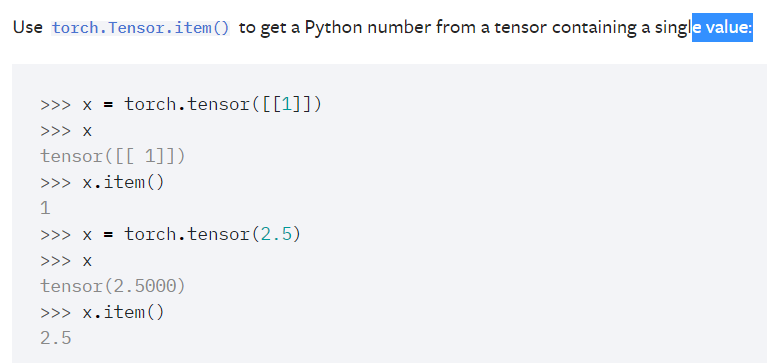